<a href="https://colab.research.google.com/github/yashsuthar00/Machine-learning/blob/main/car_evulation(18_06_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings

warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation (1).csv


In [ ]:
df = pd.read_csv('car_evaluation.csv',header=None)

In [ ]:
df.shape

(1728, 7)

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
# check data types in X_train

X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
pip install --upgrade category category_encoders

In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

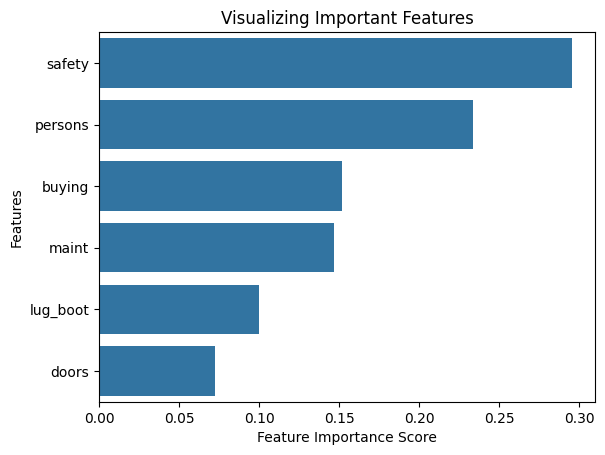

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
plt.show()

Confusion matrix

 [[114   9   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   2   0  20]]


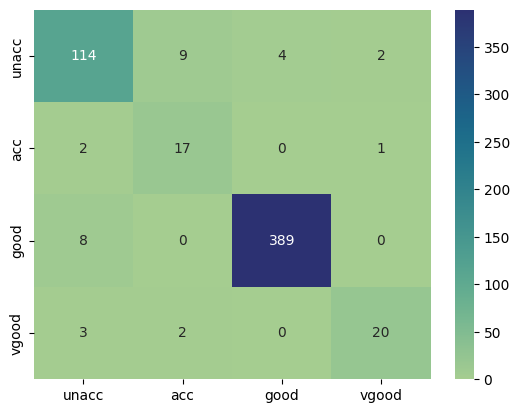

In [ ]:
from google.colab import files

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

f = sns.heatmap(cm, annot=True,fmt=".0f",xticklabels=['unacc','acc','good','vgood'],yticklabels=['unacc','acc','good','vgood'],cmap="crest")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.99      0.98      0.98       397
       vgood       0.87      0.80      0.83        25

    accuracy                           0.95       571
   macro avg       0.84      0.88      0.85       571
weighted avg       0.95      0.95      0.95       571



In [ ]:
y_test

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
1034    unacc
341       acc
147     unacc
360     unacc
83      unacc
Name: class, Length: 571, dtype: object

In [ ]:
y_pred

array(['unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'good', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good',
     

In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1
...,...,...,...,...,...,...
1034,4,2,4,3,3,2
341,1,3,3,2,3,2
147,1,2,1,2,1,1
360,1,3,1,2,2,1


In [ ]:
y_test.shape

(571,)

In [ ]:
y_test

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
1034    unacc
341       acc
147     unacc
360     unacc
83      unacc
Name: class, Length: 571, dtype: object

In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1
...,...,...,...,...,...,...
1034,4,2,4,3,3,2
341,1,3,3,2,3,2
147,1,2,1,2,1,1
360,1,3,1,2,2,1


In [ ]:
X_test.shape

(571, 6)

In [ ]:
y_test.shape

(571,)

In [ ]:
X_train.shape

(1157, 6)